# Text Analytics - Assignment 3 

In [1]:
import keras

Using TensorFlow backend.


### Read Data

In [2]:
import os
import glob

'''
Function that recursively reads text files with
a specific extension under a given root directory
'''

def read_data(directory,file_extension,class_label):
    
    data = []
    index = []
    for filename in glob.glob(directory+'/**/*'+file_extension, recursive=True):
        email_content = ""
        with open(filename, 'r',encoding='utf-8', errors='ignore') as email:
            for line in email:
                line = line.strip('\n')
                line = line.strip('\t')
                email_content+= line
        email.close()
        data.append({'text': email_content, 'label': class_label})
        index.append(filename)
                    
    return data,index

In [3]:
import pandas as pd
from sklearn.utils import shuffle

'''
Read spam and ham emails, convert to pandas,
concatenate and random shuffle
--Enron dataset is downloaded from http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/index.html (pre-processed form)
'''

Enron_dataset_dir = "Enron_dataset"
Ham_data,index_hamdata = read_data(Enron_dataset_dir,".ham.txt","Ham")
Spam_data,index_spamdata = read_data(Enron_dataset_dir,".spam.txt","Spam")
data = pd.DataFrame(Ham_data,index =index_hamdata)
data = data.append(pd.DataFrame(Spam_data,index =index_spamdata))
#shufle dataframe
data = shuffle(data,random_state = 456987)
pd.set_option("max_colwidth",2000)
data

label  \
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/spam/4377.2005-04-13.BG.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/spam/3616.2005-07-06.SA_and_HP.spam.txt  Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron4/spam/1440.2004-06-13.GP.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/2981.2001-02-05.lokay.ham.txt         Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/0058.2001-02-23.kitchen.ham.txt       Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron4/ham/4879.2002-01-17.williams.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/3503.2000-11-29.kaminski.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron4/spam/2640.2004-10-09.GP.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron4/ham/0711.2001-06-20.williams.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/spam/4803.2005-05-13.BG.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/spam/4353.2005-04-11.BG.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/0809.2001-04-27.kitchen.ham.txt       Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/ham/3065.2000-10-19.beck.ham.txt          Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/5091.2002-01-13.kitchen.ham.txt       Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/spam/5147.2005-06-06.BG.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/spam/2912.2005-06-30.SA_and_HP.spam.txt  Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/2136.2000-09-01.farmer.ham.txt        Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/4244.2001-04-09.farmer.ham.txt        Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/spam/2149.2004-12-16.BG.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/spam/1325.2004-11-10.BG.spam.txt         Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/0358.2000-02-01.kaminski.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/4484.2001-02-15.kaminski.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/5725.2001-05-02.kaminski.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/4269.2001-04-11.farmer.ham.txt        Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/0843.2001-04-30.kitchen.ham.txt       Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/spam/4397.2005-07-18.SA_and_HP.spam.txt  Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/spam/3062.2005-07-01.SA_and_HP.spam.txt  Spam   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/2315.2000-08-25.kaminski.ham.txt      Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/1275.2000-06-07.farmer.ham.txt        Ham   
/home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/2806.2001-09-28.kitchen.ham.txt       Ham   
...                                                                                                                      ...   
/home/alexia/Documents/

### Split Data (60% train, 20% development, 20% test)

In [4]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train, test = train_test_split(data, test_size = 0.2,random_state=1596)
train, dev = train_test_split(train, test_size = 0.2,random_state=1596)

X_train = list(itertools.chain.from_iterable(train[['text']].values.tolist()))
X_dev = list(itertools.chain.from_iterable(dev[['text']].values.tolist()))
X_test = list(itertools.chain.from_iterable(test[['text']].values.tolist()))

y_train = list(itertools.chain.from_iterable(train[['label']].values.tolist()))
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_dev = le.transform(list(itertools.chain.from_iterable(dev[['label']].values.tolist())))
y_test = le.transform(list(itertools.chain.from_iterable(test[['label']].values.tolist())))

### Feature extraction

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pprint

#Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features = 5000 ,sublinear_tf=True)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_dev_tfidf = vectorizer.transform(X_dev)
X_test_tfidf = vectorizer.transform(X_test)

### Feature selection

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

cv = SelectKBest(score_func=mutual_info_classif, k=500)
X_train = cv.fit_transform(X_train_tfidf,y_train)
X_dev = cv.transform(X_dev_tfidf)
X_test = cv.transform(X_test_tfidf)

### Define metrics

In [7]:
def recall(y_true, y_pred):
    
    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    
    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))


def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)), axis=1)


### Create model function 

In [8]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras import backend as K

def create_network(optimizer,activation ,hidden_layers=1):
    n_classes=1 
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(500, input_dim=500 , activation='relu'))
    network.add(Dropout(0.5))

    # Add fully connected hidden layers with a tuned activation function
    for i in range(hidden_layers):
        network.add(Dense(256,  activation=activation))
        network.add(Dropout(0.5))

    # Add fully connected layer with a sigmoid activation function
    network.add(Dense(n_classes,  activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy',precision]) 
    
    # Return compiled network
    return network

In [9]:
# Create hyperparameter space
activation = ['relu', 'tanh', 'sigmoid']
batches = [50, 100]
optimizers = ['sgd','Adam']
hidden_layers=[1,2,5,8]

hyperparameters = dict(optimizer=optimizers, batch_size=batches,activation=activation,hidden_layers=hidden_layers)

### Tune hyperparameters with GridSearchCV

In [10]:
# Create grid search
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_network)

grid = GridSearchCV(estimator=model,cv=StratifiedKFold(n_splits=5), param_grid=hyperparameters, n_jobs=-1,scoring ='f1')

# Fit grid search
grid_result = grid.fit(X_train, y_train)

Epoch 1/1
21577/21577 [==============================] - ETA: 6:57 - loss: 0.6949 - acc: 0.4600 - precision: 0.318 - ETA: 3:41 - loss: 0.6942 - acc: 0.4500 - precision: 0.325 - ETA: 1:56 - loss: 0.6950 - acc: 0.4350 - precision: 0.329 - ETA: 1:10 - loss: 0.6922 - acc: 0.4800 - precision: 0.477 - ETA: 36s - loss: 0.6868 - acc: 0.5729 - precision: 0.645 - ETA: 23s - loss: 0.6755 - acc: 0.6509 - precision: 0.68 - ETA: 18s - loss: 0.6506 - acc: 0.6979 - precision: 0.73 - ETA: 14s - loss: 0.6002 - acc: 0.7373 - precision: 0.76 - ETA: 12s - loss: 0.5235 - acc: 0.7766 - precision: 0.79 - ETA: 10s - loss: 0.4683 - acc: 0.8011 - precision: 0.81 - ETA: 9s - loss: 0.4306 - acc: 0.8187 - precision: 0.8327 - ETA: 8s - loss: 0.3945 - acc: 0.8341 - precision: 0.845 - ETA: 7s - loss: 0.3732 - acc: 0.8446 - precision: 0.854 - ETA: 6s - loss: 0.3489 - acc: 0.8555 - precision: 0.861 - ETA: 6s - loss: 0.3349 - acc: 0.8627 - precision: 0.868 - ETA: 5s - loss: 0.3216 - acc: 0.8692 - precision: 0.873 - ETA: 

In [11]:
print('The best parameters are:',grid_result.best_params_)
print(grid_result.best_score_)

The best parameters are: {'activation': 'relu', 'batch_size': 50, 'hidden_layers': 2, 'optimizer': 'Adam'}
0.9653662897646957


In [12]:
pd.DataFrame(grid_result.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        6.834901      0.118429         0.871941        0.102421   
1        9.400720      0.395758         0.509410        0.101557   
2        7.394315      0.569737         0.993824        0.147779   
3        9.675736      0.333890         0.818815        0.269863   
4       13.432274      1.526023         1.065704        0.530313   
5       14.601110      0.484421         0.996951        0.148046   
6       18.288892      3.009923         1.040701        0.093025   
7       20.732826      0.628584         1.521994        0.138572   
8        6.378610      1.034231         0.925072        0.115424   
9       11.447742      0.421689         0.653173        0.138500   
10       8.084989      1.688628         0.765683        0.150855   
11       7.953731      0.514194         0.784433        0.082329   
12      10.866450      0.176126         0.984450        0.296486   
13      11.929032      0.171062         0.968822        0.100299   
14      14.919883      0.819646         1.253221        0.174957   
15      17.320068      1.393753         1.412606        0.184255   
16       8.853798      1.197444         1.437610        0.372022   
17      10.707064      0.512711         1.021953        0.070299   
18      10.319533      0.913649         1.284475        0.215030   
19      12.010287      0.491026         1.140711        0.173722   
20      14.426095      0.607488         1.459486        0.151050   
21      16.773150      0.769823         1.609497        0.384798   
22      19.335845      0.864261         2.143913        0.386621   
23      23.154883      1.125753         2.009528        0.236903   
24       9.913254      1.381433         1.672000        0.105979   
25      10.469547      0.343919         1.096958        0.047807   
26       8.881927      0.797861         1.296973        0.192400   
27       9.350709      0.318500         1.106334        0.075524   
28      11.688389      0.502668         1.509489        0.251498   
29      13.466652      0.600371         1.565741        0.125168   
30      16.048095      0.361638         1.987651        0.469346   
31      18.479529      0.923115         2.122035        0.369570   
32      10.588305      1.255770         1.831388        0.298685   
33      11.469624      0.369783         1.700129        0.300964   
34      12.407195      0.305571         1.587619        0.068897   
35      12.966612      0.323337         2.006401        0.156449   
36      15.910584      0.457225         2.212668        0.101558   
37      18.832680      0.670681         2.409557        0.212056   
38      21.586016      0.191022         2.825215        0.451963   
39      25.473814      0.652822         2.718954        0.367530   
40      11.754018      1.541043         2.153294        0.433323   
41      11.750892      0.816400         1.706380        0.074221   
42      10.044512      0.384975         1.715757        0.308022   
43      11.319610      0.173894         1.750133        0.225364   
44      13.607284      0.285134         1.900144        0.104870   
45      16.163727      0.317883         2.284549        0.367584   
46      17.660717      0.478417         2.031404        0.216073   
47      17.957614      1.372240         1.265721        0.329709   

   param_activation param_batch_size param_hidden_layers param_optimizer  \
0              relu               50                   1             sgd   
1              relu               50                   1            Adam   
2              relu               50                   2             sgd   
3              relu               50                   2            Adam   
4              relu               50                   5             sgd   
5              relu               50                   5            Adam   
6              relu               50                   8             sgd   
7              relu               50                   8       

### Tune epochs

In [13]:
activation_grid=grid_result.best_params_['activation']
batch_grid=grid_result.best_params_['batch_size']
hidden_layers_grid=grid_result.best_params_['hidden_layers']
optimizer_grid=grid_result.best_params_['optimizer']

In [9]:
activation_grid='tanh'
batch_grid=50
hidden_layers_grid=2
optimizer_grid='Adam'

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

n_classes=1


network = Sequential()

network.add(Dense(500, input_dim=500 , activation='relu'))
network.add(Dropout(0.5))
for i in range(hidden_layers_grid):
    network.add(Dense(256,  activation=activation_grid))
    network.add(Dropout(0.5))
network.add(Dense(n_classes,  activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer=optimizer_grid, metrics=[f1,precision])

'''
saves the model weights after each epoch if the validation loss decreased
'''
checkpointer = EarlyStopping(monitor='val_f1', verbose=1, patience=10 ,mode='max' ,restore_best_weights=True)
keras.callbacks.History()

history = network.fit(X_train, y_train, batch_size=batch_grid, epochs=100, verbose=0, validation_data=(X_dev, y_dev), callbacks=[checkpointer])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Restoring model weights from the end of the best epoch
Epoch 00026: early stopping


In [11]:
y_prob=network.predict(X_test)
y_pred=[1 if x>0.5 else 0 for x in y_prob]

In [12]:
y_prob = y_prob.reshape(y_prob.shape[0],)

In [13]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9763211088651458

In [14]:
scores=network.evaluate(X_test,y_test)
# print('Test loss:', scores[0])
# print('Test f1:', scores[1])
# print('Test precision:', scores[2])


6744/6744 [==============================] - 0s 72us/step


In [15]:
print("test data confusion matrix")
y_true = pd.Series(y_test, name='True')
y_predict = pd.Series(y_pred, name='Predicted')
y_probs = pd.Series(y_prob, name='Probability')
pd.crosstab(y_true, y_predict)

test data confusion matrix


Predicted     0     1
True                 
0          3199    93
1            71  3381

In [16]:
import pandas as pd

In [17]:
test1 = test.reset_index()

In [18]:
neutral_df = test1[(y_probs>0.45)&(y_probs<0.55)]
high_prob_df = test1[(y_true!=y_predict)&(y_probs>0.9)]
low_prob_df = test1[(y_true!=y_predict)&(y_probs<0.1)]

In [19]:
high_prob_df

index  \
470    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/3980.2001-11-13.kitchen.ham.txt   
624       /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/ham/4122.2001-01-19.beck.ham.txt   
658   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron4/ham/1999.2001-08-09.williams.ham.txt   
683    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/2274.2001-09-05.kitchen.ham.txt   
993   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron4/ham/1564.2001-07-26.williams.ham.txt   
1109   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/1954.2001-08-09.kitchen.ham.txt   
1218     /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/5718.2002-02-27.lokay.ham.txt   
1275     /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/2973.2001-02-02.lokay.ham.txt   
1291   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/1398.2001-07-02.kitchen.ham.txt   
1312  /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/3534.2000-12-01.kaminski.ham.txt   
1414    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/0949.2000-04-17.farmer.ham.txt   
1628      /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/ham/3953.2001-01-14.beck.ham.txt   
1709    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/4663.2001-06-13.farmer.ham.txt   
1749  /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/0268.2000-01-19.kaminski.ham.txt   
1906    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/0412.2000-02-14.farmer.ham.txt   
2035      /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron5/ham/4051.2001-01-16.beck.ham.txt   
2049   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/4533.2001-12-11.kitchen.ham.txt   
2176   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/4535.2001-12-11.kitchen.ham.txt   
2202     /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/1825.2000-11-10.lokay.ham.txt   
2311  /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/5210.2001-04-13.kaminski.ham.txt   
2441     /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/1812.2000-11-10.lokay.ham.txt   
2460  /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/0734.2000-03-15.kaminski.ham.txt   
2668     /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/0122.2000-06-21.lokay.ham.txt   
2715    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/1871.2000-08-06.farmer.ham.txt   
3083     /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron6/ham/5519.2002-02-05.lokay.ham.txt   
3146    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/0411.2000-02-14.farmer.ham.txt   
3311  /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/3283.2000-11-10.kaminski.ham.txt   
3329   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/3495.2001-10-28.kitchen.ham.txt   
3376    /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron1/ham/4905.2001-09-14.farmer.ham.txt   
3455   /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron3/ham/4365.2001-11-30.kitchen.ham.txt   
...                                                                                                                   ...   
3658  /home/alexia/Documents/2-semester/Text-Analytics/datasets/Enron_dataset/enron2/ham/0161.2000-01-11.kaminski.ha

In [20]:
#store in csv
neutral_df.to_csv('neutral_emails.csv')
high_prob_df.to_csv('high_prob.csv')
low_prob_df.to_csv('low_prob.csv')

In [21]:
wrong=test1[y_true!=y_predict]
misclassified_ham = wrong.loc[wrong['label'] == 'Ham']
misclassified_spam = wrong.loc[wrong['label'] == 'Spam']

Find bigrams and trigrams in the missclassified ham and spam

In [22]:
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams

In [23]:
def calculate_bi_tri(wrong):
    #join emails 
    emails = []
    for index, row in wrong.iterrows():
        emails.append(row['text'])
    emails = ' '.join(emails)
    tweet_wt = TweetTokenizer()
    tokens = tweet_wt.tokenize(emails)
    bigrams = [ gram for gram in ngrams(tokens, 2) ]
    trigrams = [ gram for gram in ngrams(tokens, 3) ]
    return bigrams, trigrams

In [24]:
ham_bi, ham_tri = calculate_bi_tri(misclassified_ham)
spam_bi, spam_tri = calculate_bi_tri(misclassified_spam)

In [25]:
count_ham_tri = Counter(ham_tri)
most_common_ham = count_ham_tri.most_common()

In [26]:
count_spam_tri = Counter(spam_tri)
most_common_spam = count_spam_tri.most_common()

In [27]:
most_common_ham

[(("'", ';', "'"), 978),
 (('.', 'com', "'"), 701),
 (('com', "'", ';'), 700),
 (('-', '-', '-'), 436),
 (('.', 'net', "'"), 233),
 (('net', "'", ';'), 233),
 (('@', 'aol', '.'), 105),
 (('aol', '.', 'com'), 105),
 (('@', 'hotmail', '.'), 61),
 (('hotmail', '.', 'com'), 61),
 (('@', 'home', '.'), 49),
 (('home', '.', 'com'), 49),
 (('@', 'yahoo', '.'), 47),
 (('yahoo', '.', 'com'), 46),
 (('@', 'flash', '.'), 44),
 (('flash', '.', 'net'), 44),
 (('_', '_', '_'), 37),
 (('@', 'airmail', '.'), 34),
 (('airmail', '.', 'net'), 34),
 (('~', '~', '~'), 29),
 (('ti', '.', 'com'), 25),
 (('msn', '.', 'com'), 23),
 (('@', 'ti', '.'), 22),
 (('@', 'msn', '.'), 22),
 (('att', '.', 'net'), 20),
 (('@', 'worldnet', '.'), 19),
 (('worldnet', '.', 'att'), 19),
 (('.', 'att', '.'), 19),
 (('.', 'Subject', ':'), 18),
 (('it', "'", 's'), 18),
 (('i', "'", 'm'), 17),
 (('@', 'gte', '.'), 17),
 (('gte', '.', 'net'), 17),
 (('.', 'edu', "'"), 17),
 (('edu', "'", ';'), 17),
 (('.', 'org', "'"), 17),
 (('org

Above are the trigrams of the ham mails that were misclassified. Words like: jpg, congratulations, bucks, dawg, gwmail, $, coupon denote spam mails.

In [28]:
most_common_spam

[(('out', 'how', 'much'), 115),
 (('how', 'much', 'is'), 115),
 (('much', 'is', 'in'), 115),
 (('find', 'out', 'how'), 114),
 (('is', 'in', 'this'), 114),
 (('in', 'this', 'wallet'), 114),
 (('this', 'wallet', '.'), 114),
 (('wallet', '.', 'find'), 113),
 (('.', 'find', 'out'), 113),
 (('-', '-', '-'), 35),
 (('*', '*', '*'), 20),
 (('+', '+', '+'), 20),
 (('.', 'Subject', ':'), 18),
 ((':', '/', '/'), 14),
 (('/', '/', 'www'), 11),
 (('?', 'q', '?'), 11),
 (('http', ':', '/'), 11),
 (('/', 'www', '.'), 10),
 (('?', '?', '?'), 10),
 (('2003', '-', '12'), 10),
 (('-', '12', '-'), 10),
 (('fall', '03', 'finals'), 10),
 (('.', 'com', '/'), 9),
 (('ucd', 'fall', '03'), 8),
 ((':', 're', ':'), 7),
 (('it', "'", 's'), 7),
 (('Subject', ':', 're'), 7),
 (('.', 'if', 'you'), 6),
 (('-', 'op', 'gold'), 6),
 (('gold', 'smart', 'cd'), 6),
 (('i', "'", 'm'), 6),
 (('=', '?', 'utf'), 6),
 (('?', 'utf', '-'), 6),
 (('utf', '-', '8'), 6),
 (('-', '8', '?'), 6),
 (('8', '?', 'q'), 6),
 (('?', '=', '='

### Learning Curves



dict_keys(['val_loss', 'val_f1', 'val_precision', 'loss', 'f1', 'precision'])


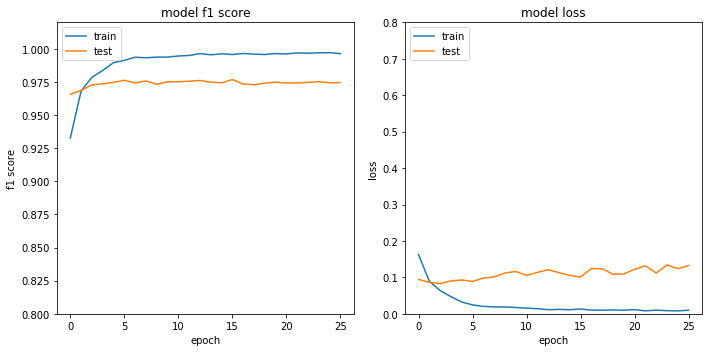

In [31]:
import matplotlib.pyplot as plt

print("\n")
print(history.history.keys())
plt.figure(figsize=(10, 5))
# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.ylim([0.8, 1.02])
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.ylim([0.0, 0.8])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

## Precision-recall curves 

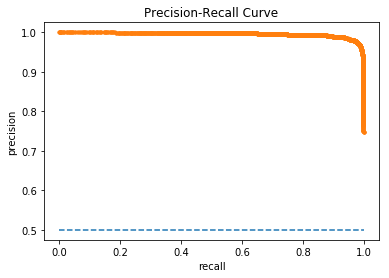

In [30]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.xlabel('recall')
pyplot.ylabel('precision')
pyplot.title('Precision-Recall Curve')
pyplot.show()